# Context-Free Grammars and Parsing with NLTK
Partially taken from the NLTK book


## Initializations:


In [41]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt-get update
!apt install ghostscript python3-tk
#from ctypes.util import find_library
#find_library("gs")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-c

## Loading a CFG grammar:

In [42]:
import nltk

from nltk import CFG
from IPython.display import display

grammar = CFG.fromstring("""
   S -> NP VP
   PP -> P NP
   NP -> Det N | NP PP
   VP -> V NP | VP PP
   Det -> 'a' | 'the'
   N -> 'dog' | 'cat'
   V -> 'chased' | 'sat'
   P -> 'on' | 'in'
 """)

## Analyzing sentences:

In [43]:
sent1 = "the dog chased the cat".split()
sent2 = "the dog chased the cat on the dog".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sent1): print(p)

(S (NP (Det the) (N dog)) (VP (V chased) (NP (Det the) (N cat))))


### Viewing the syntax tree:

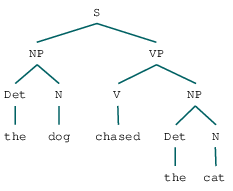

In [44]:
# A single parse tree
display(p)

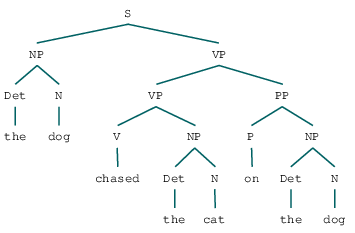

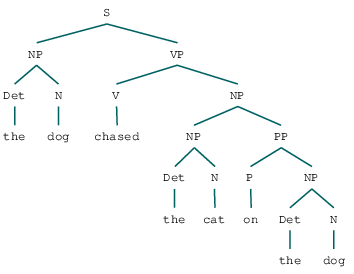

In [45]:
# When there are several analyses
for p in chart_parser.parse(sent2): display(p)

## Generating sentences given a CFG:


In [46]:
from nltk.parse.generate import generate, demo_grammar
from nltk import CFG
grammar = CFG.fromstring(demo_grammar)
print(grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'


In [47]:
for sentence in generate(grammar, n=50, depth=5):
     print(' '.join(sentence))

the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man
the man saw a park
the man saw a dog
the park slept
the park saw the man
the park saw the park
the park saw the dog
the park saw a man
the park saw a park
the park saw a dog
the dog slept
the dog saw the man
the dog saw the park
the dog saw the dog
the dog saw a man
the dog saw a park
the dog saw a dog
a man slept
a man saw the man
a man saw the park
a man saw the dog
a man saw a man
a man saw a park
a man saw a dog
a park slept
a park saw the man
a park saw the park
a park saw the dog
a park saw a man
a park saw a park
a park saw a dog
a dog slept
a dog saw the man
a dog saw the park
a dog saw the dog
a dog saw a man
a dog saw a park
a dog saw a dog


## Example: issues in grammar design: avoid unnecessary ambiguity


(ADJP
  (ADJP (ADJP (ADJP white) (ADJP expensive)) (ADJP tall))
  (ADJP small))


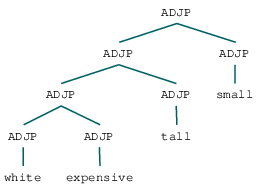

(ADJP
  (ADJP (ADJP white) (ADJP (ADJP expensive) (ADJP tall)))
  (ADJP small))


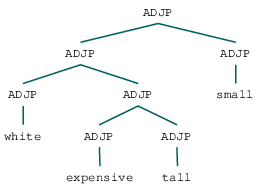

(ADJP
  (ADJP white)
  (ADJP (ADJP (ADJP expensive) (ADJP tall)) (ADJP small)))


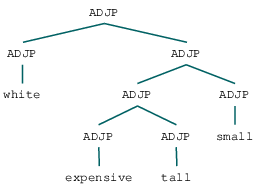

(ADJP
  (ADJP white)
  (ADJP (ADJP expensive) (ADJP (ADJP tall) (ADJP small))))


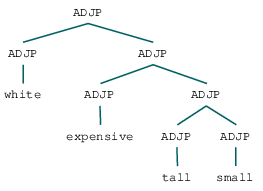

(ADJP
  (ADJP (ADJP white) (ADJP expensive))
  (ADJP (ADJP tall) (ADJP small)))


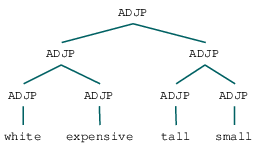

In [48]:
import nltk
from nltk import CFG

grammar = CFG.fromstring("""
   ADJP -> ADJP ADJP
   ADJP -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise: rewrite the grammar so that there is only a single analysis for adjective chains

(ADJP
  (ADJ white)
  (ADJP (ADJ expensive) (ADJP (ADJ tall) (ADJP (ADJ small)))))


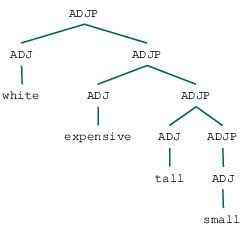

In [49]:
grammar2 = CFG.fromstring("""
   # Design your new ADJP grammar based on this one:
   ADJP -> ADJ ADJP
   ADJP -> ADJ
   ADJ -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar2)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise (homework assignment)

Take the following grammar:

In [50]:
from nltk import CFG

grammar = CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | NP PP
 NP -> Det ADJ N
 VP -> V NP | VP PP
 Det -> 'a' | 'the'
 N -> 'dog' | 'cat'
 V -> 'chased' | 'sat'
 P -> 'on' | 'in'
 ADJ -> A | ADJ A
 A -> 'big' | 'white'
 S1 -> NP VP | NP V
 S -> S CORD S1
 CORD -> 'and'
 """)

Write rules:
* Simple sentences:
  * the big white cat sat on the dog
  * today the big white cat sat on the dog
  * Sally ate a sandwich .
  * Sally and the president wanted and ate a sandwich .
  * the president sighed .
  * the president thought that a sandwich sighed .
  * it perplexed the president that a sandwich ate Sally .
  * the very very very perplexed president ate a sandwich .
  * the president worked on every proposal on the desk .
* Relative clauses:
  * the cat that the dog chased chased the dog
* Coordination:
  * The cat and the dog chased the cat
* **Always save the last correct grammar (and example sentences)!** <br> Any change can have positive or negative effects, and there must always be a way to go back to the last correct version
* Document the resulting grammar: range of syntactic constructions covered, example analyses, limitations, ...
* Provide 5 random sentences generated with your last version of the grammar  illustrating your modifications.

Something to start with:

In [85]:
  
grammar = CFG.fromstring("""
 S    -> PRN VP | NP VP |  N VP  | NP V  | ADV NP VP | NP V SubS | PRN VP SubS | N VP SubS | NP SubS VP
 SubS -> Sub S 
 PP   -> P NP
 NP   -> Det N | Det NP | ADJ N | ADJ NP | ADVP | ADJP
 NP   -> NP CORD NP
 VP   -> V PP PP  | V NP | V PP | VP NP | VP PP
 VP   -> V CORD V
 ADVP -> ADV NP
 ADJP -> ADV ADJ | ADJ

 Sub  -> 'that' 
 ADV  -> 'today'| 'very'      
 Det  -> 'the'  | 'a'     | 'every'  
 ADJ  -> 'big'  | 'white' | 'sighed'    | 'perplexed' | 'white'     | 'expensive'   
 N    -> 'cat'  | 'dog'   | 'sandwich'  | 'president' | 'proposal'  | 'desk' 
 NP   -> 'Sally'
 V    -> 'sat'  | 'ate'   | 'wanted'    | 'sighed'    | 'thought'   | 'worked'     | 'chased' | 'perplexed'
 P    -> 'on'   | 'in'
 PRN  -> 'it'
 S1   ->  NP VP | NP V
 S    ->  S CORD S1
 CORD -> 'and'
 """)
  
  
  some_sents=["the big white cat sat on the dog",
            "today the big white cat sat on the dog",
            "Sally ate a sandwich",
            "the president sighed",
            "the president worked on every proposal on the desk"]

  silly_sents = ["the president thought that a sandwich sighed",
            "it perplexed the president that a sandwich ate Sally",
            "the very very very perplexed president ate a sandwich"]

  rel_sents = ["the cat that the dog chased chased the dog"]

  coor_sents = ["the cat and the dog chased the cat",
            "Sally and the president wanted and ate a sandwich"]

all_sents = some_sents, silly_sents, rel_sents, coor_sents

  def dependences(sent):
    print(sent)
    if len(sent) > 1:
      sent = sent.split()
      chart_parser = nltk.ChartParser(grammar)
    else:
      chart_parser = nltk.ChartParser(grammar)
    for p in chart_parser.parse(sent):
      print(p)
      display(p)
    return chart_parser.parse(sent)


['the big white cat sat on the dog', 'today the big white cat sat on the dog', 'Sally ate a sandwich', 'the president sighed', 'the president worked on every proposal on the desk']
the big white cat sat on the dog
(S
  (NP (Det the) (NP (ADJ big) (NP (ADJ white) (N cat))))
  (VP (V sat) (PP (P on) (NP (Det the) (N dog)))))


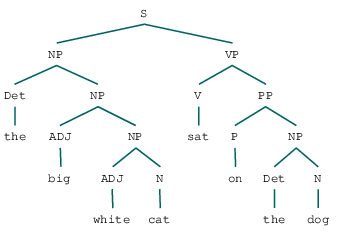

today the big white cat sat on the dog
(S
  (ADV today)
  (NP (Det the) (NP (ADJ big) (NP (ADJ white) (N cat))))
  (VP (V sat) (PP (P on) (NP (Det the) (N dog)))))


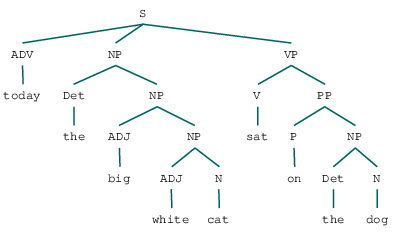

(S
  (NP
    (ADVP
      (ADV today)
      (NP (Det the) (NP (ADJ big) (NP (ADJ white) (N cat))))))
  (VP (V sat) (PP (P on) (NP (Det the) (N dog)))))


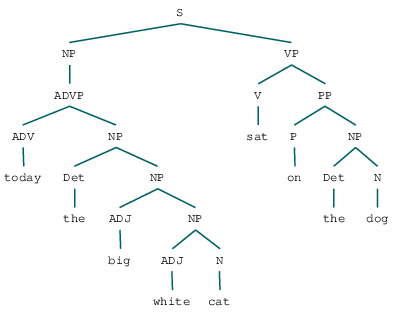

Sally ate a sandwich
(S (NP Sally) (VP (V ate) (NP (Det a) (N sandwich))))


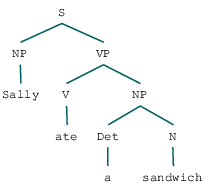

the president sighed
(S (NP (Det the) (N president)) (V sighed))


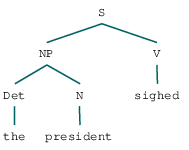

the president worked on every proposal on the desk
(S
  (NP (Det the) (N president))
  (VP
    (VP (V worked) (PP (P on) (NP (Det every) (N proposal))))
    (PP (P on) (NP (Det the) (N desk)))))


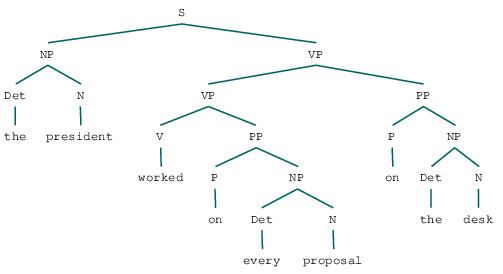

(S
  (NP (Det the) (N president))
  (VP
    (V worked)
    (PP (P on) (NP (Det every) (N proposal)))
    (PP (P on) (NP (Det the) (N desk)))))


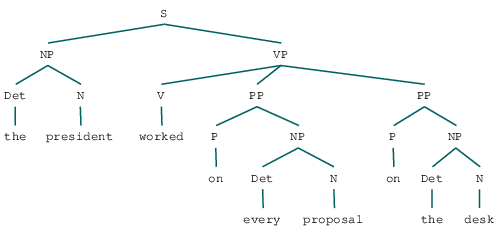

['the president thought that a sandwich sighed', 'it perplexed the president that a sandwich ate Sally', 'the very very very perplexed president ate a sandwich']
the president thought that a sandwich sighed
(S
  (NP (Det the) (N president))
  (V thought)
  (SubS (Sub that) (S (NP (Det a) (N sandwich)) (V sighed))))


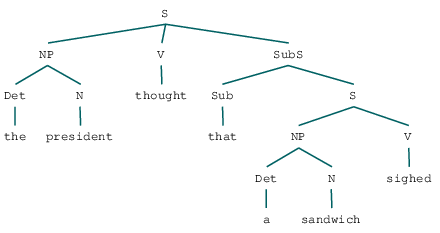

it perplexed the president that a sandwich ate Sally
(S
  (PRN it)
  (VP (V perplexed) (NP (Det the) (N president)))
  (SubS
    (Sub that)
    (S (NP (Det a) (N sandwich)) (VP (V ate) (NP Sally)))))


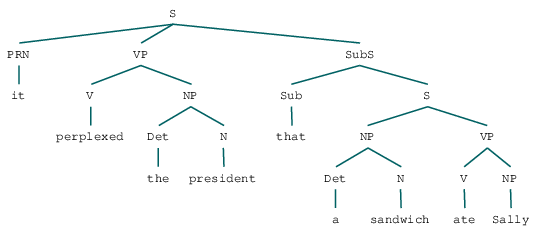

the very very very perplexed president ate a sandwich
(S
  (NP
    (Det the)
    (NP
      (ADVP
        (ADV very)
        (NP
          (ADVP
            (ADV very)
            (NP (ADVP (ADV very) (NP (ADJ perplexed) (N president)))))))))
  (VP (V ate) (NP (Det a) (N sandwich))))


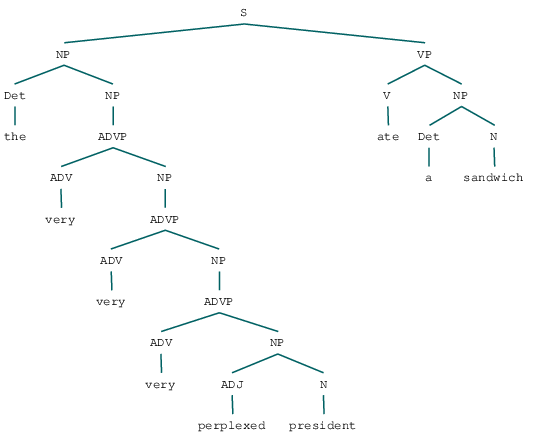

['the cat that the dog chased chased the dog']
the cat that the dog chased chased the dog
(S
  (NP (Det the) (N cat))
  (SubS (Sub that) (S (NP (Det the) (N dog)) (V chased)))
  (VP (V chased) (NP (Det the) (N dog))))


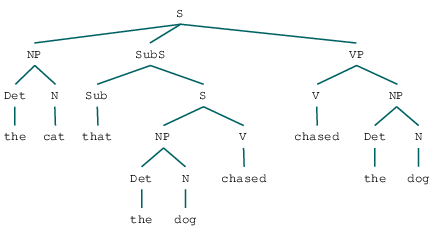

['the cat and the dog chased the cat', 'Sally and the president wanted and ate a sandwich']
the cat and the dog chased the cat
(S
  (NP (NP (Det the) (N cat)) (CORD and) (NP (Det the) (N dog)))
  (VP (V chased) (NP (Det the) (N cat))))


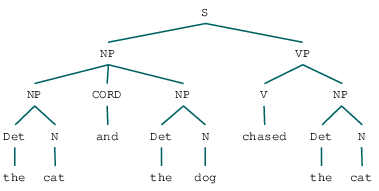

Sally and the president wanted and ate a sandwich
(S
  (NP (NP Sally) (CORD and) (NP (Det the) (N president)))
  (VP (VP (V wanted) (CORD and) (V ate)) (NP (Det a) (N sandwich))))


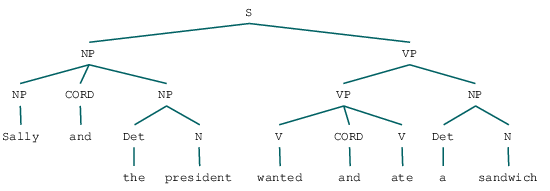

In [86]:

for lst in all_sents:
  print(lst)
  for sent in lst:
    dependences(sent)